In [1]:
import json, pickle, ast

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from matplotlib import pyplot as plt
from pathlib import Path

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load data
# EXP_DIR = Path('/NAS/JW/deit/output/deit_small_patch16_224_in100_finetune')
# LRS=['1.5e-5', '5e-5', '1.5e-4', '5e-4']

EXP_DIR = Path('/NAS/JW/deit/output/deit_small_patch16_224_in200_finetune')
LRS=['1.5e-5', '5e-5']

In [3]:
def get_exp_results(log_path):
    
    results = []

    with open(log_path, 'r') as file:
        json_data = file.read()
        data_str = json_data.split("\n")
        for ds in data_str:
            try:
                res = ast.literal_eval(ds)
                results.append(res)
            except:
                print("data string is invalid: ", ds)

    return results

resultss = []
for LR in LRS:
    DATA_PATH = EXP_DIR / f'lr_{LR}' / 'log.txt'
    resultss += [get_exp_results(log_path = DATA_PATH)]

data string is invalid:  
data string is invalid:  
data string is invalid:  
data string is invalid:  


In [4]:
def dictlist2lists(dict_list):
    
    lists = {}
    keys = list(dict_list[0].keys())
    print("keys: ", keys)
    for k in keys:
        lists[k] = []
    
    for dict in dict_list:
        for k in keys:
            lists[k] += [dict[k]]

    return lists

metric_lists = []
for results in resultss:
    metric_lists += [dictlist2lists(results)]

keys:  ['train_lr', 'train_loss', 'test_loss', 'test_acc1', 'test_acc5', 'epoch', 'n_parameters']
keys:  ['train_lr', 'train_loss', 'test_loss', 'test_acc1', 'test_acc5', 'epoch', 'n_parameters']
keys:  ['train_lr', 'train_loss', 'test_loss', 'test_acc1', 'test_acc5', 'epoch', 'n_parameters']
keys:  ['train_lr', 'train_loss', 'test_loss', 'test_acc1', 'test_acc5', 'epoch', 'n_parameters']


LR: 1.5e-5, Best Epoch: 79
LR: 5e-5, Best Epoch: 63
LR: 1.5e-4, Best Epoch: 3
LR: 5e-4, Best Epoch: 291


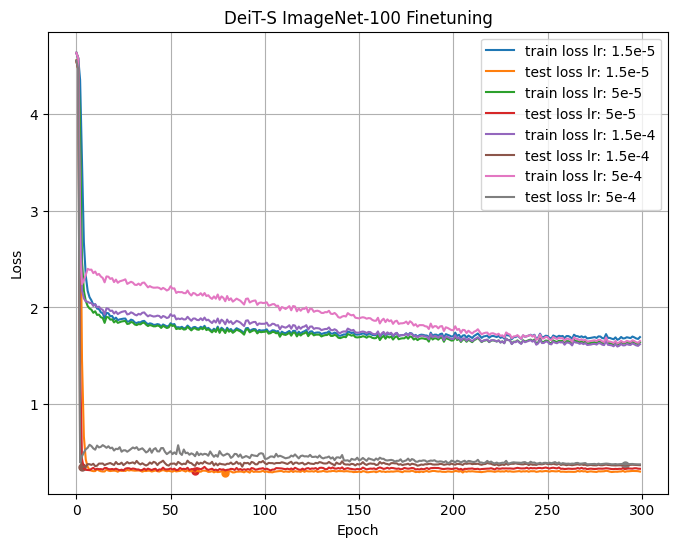

In [5]:
# plot the figure
train_loss_valuess = []
test_loss_valuess = []
best_epochs = []

for metric_list in metric_lists:
    train_loss_valuess += [metric_list['train_loss']]
    test_loss_valuess += [metric_list['test_loss']]
    min_test_loss_value = min(metric_list['test_loss'])
    best_epochs += [metric_list['test_loss'].index(min_test_loss_value)]

epochs = list(range(len(train_loss_valuess[0])))

fig, ax = plt.subplots(figsize=(8, 6))
for LR, train_loss_values, test_loss_values, best_epoch in zip(LRS, train_loss_valuess, test_loss_valuess, best_epochs):
    ax.plot(epochs, train_loss_values, label=f'train loss lr: {LR}')
    line, = ax.plot(epochs, test_loss_values, label=f'test loss lr: {LR}')

    color = line.get_color()

    ax.scatter(epochs[best_epoch], test_loss_values[best_epoch], color=color, s=25)

    print(f"LR: {LR}, Best Epoch: {best_epoch}")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('DeiT-S ImageNet-100 Finetuning')
plt.grid(True)
plt.legend()
plt.show()

LR: 1.5e-5, Best Epoch: 78, Best Acc@1: 95.040%
LR: 5e-5, Best Epoch: 206, Best Acc@1: 94.640%
LR: 1.5e-4, Best Epoch: 275, Best Acc@1: 93.900%
LR: 5e-4, Best Epoch: 297, Best Acc@1: 93.280%


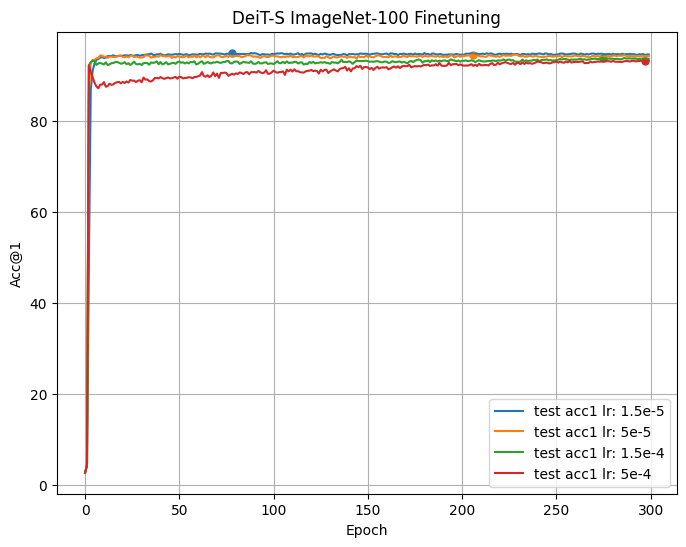

In [6]:
test_acc1_valuess = []
best_epochs = []

for metric_list in metric_lists:
    test_acc1_valuess += [metric_list['test_acc1']]
    max_test_acc1_value = max(metric_list['test_acc1'])
    best_epochs += [metric_list['test_acc1'].index(max_test_acc1_value)]

epochs = list(range(len(train_loss_valuess[0])))

fig, ax = plt.subplots(figsize=(8, 6))
for LR, test_acc1_values, best_epoch in zip(LRS, test_acc1_valuess, best_epochs):
    line, = ax.plot(epochs, test_acc1_values, label=f'test acc1 lr: {LR}')

    color = line.get_color()

    ax.scatter(epochs[best_epoch], test_acc1_values[best_epoch], color=color, s=25)

    print(f"LR: {LR}, Best Epoch: {best_epoch}, Best Acc@1: {test_acc1_values[best_epoch]:.3f}%")

plt.xlabel('Epoch')
plt.ylabel('Acc@1')
plt.title('DeiT-S ImageNet-100 Finetuning')
plt.grid(True)
plt.legend()
plt.show()